In [240]:
import numpy as np
import matplotlib.pyplot as plot
import pandas as pd
from matplotlib.dates import AutoDateLocator, DateFormatter 
%matplotlib inline

In [241]:
path = '/Users/james/machinelearning/LR/data/stock1.csv'

In [242]:
data = pd.read_csv(path, header =None, names=['Date','High'])

In [243]:
data.head()
data1 = data[0:500]


In [244]:
data1.describe()

,High
count,500.000000
mean,2950.208300
std,877.976207
min,2005.940000
25%,2110.630000
50%,2862.345000
75%,3592.892500
max,5178.190000


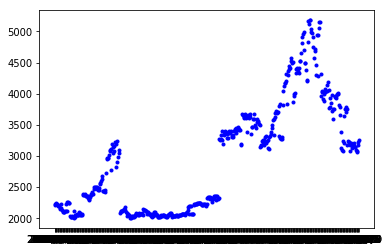

In [245]:
 plot.plot_date(data1.Date,data1.High,fmt='b.')

In [246]:
#cost function
def computeCost(w,X,y):
    inner = np.power((w.T*X)-y,2)
    return np.sum(inner)/(2*len(X))

In [247]:
data1.shape


(500, 2)

In [248]:
# append a ones column to the front of the data set
data1.insert(0,'Ones',1)

In [249]:
data1.insert(1,'Number',range(0,500))

In [250]:
cols = data1.shape[1]

In [251]:
X = data1.iloc[:,0:2]
y = data1.iloc[:,3:4]

In [252]:
X = np.matrix(X.values)
y = np.matrix(y.values)
theta2 = np.matrix(np.array([0,0])) 

In [253]:
X.shape, y.shape, theta2.shape

((500, 2), (500, 1), (1, 2))

In [254]:
theta2.ravel().shape[1]

2

In [255]:
np.matrix(np.zeros(theta2.shape))

matrix([[0., 0.]])

In [256]:
def gradientDescent(X,y,theta,alpha,iters):
    temp = np.matrix(np.zeros(theta.shape))
    parameter = int(theta.ravel().shape[1])
    cost = np.zeros(iters)
    for i in range(iters):
        error = (X*theta.T)-y
        
        for j in range(parameter):
            term = np.multiply(error,X[:,j])
            temp[0,j]=theta[0,j] - (alpha/len(X)*np.sum(term))
        
        theta = temp
        cost[i] = computeCost(X,y,theta)
    return theta,cost



In [259]:
alpha = 0.01
iters = 500
g, cost = gradientDescent(X,y,theta2,alpha,iters)

/Users/james/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in power
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/james/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:36: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial)


In [260]:
g

matrix([[nan, nan]])

In [237]:
computeCost(X,y,g)

275203963.0849165

Text(0.5,1,'date and stock high')

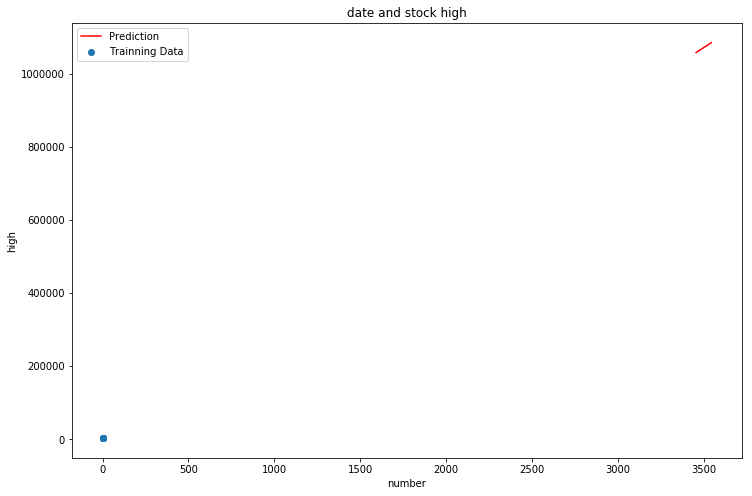

In [238]:


fig , ax = plt.subplots(figsize=(12,8))
ax.plot(x,f,'r',label='Prediction')
ax.scatter(data1.Number,data1.High,label='Trainning Data')
ax.legend(loc=2)
ax.set_xlabel('number')
ax.set_ylabel("high")
ax.set_title("date and stock high")

Text(0.5,1,'Error vs. Training Epoch')

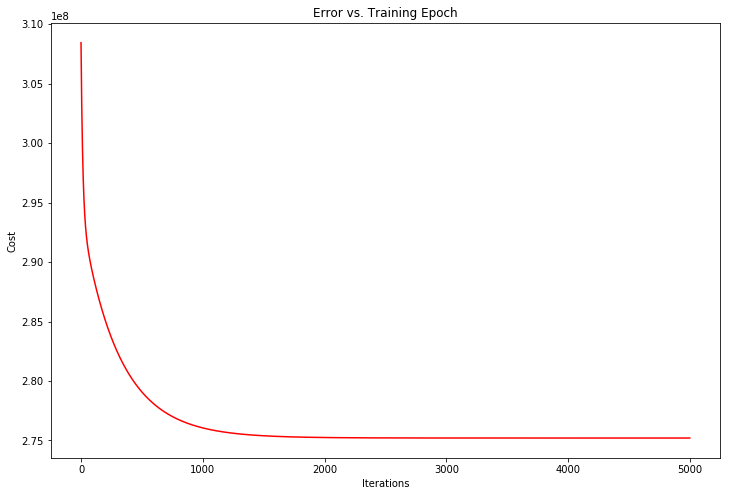

In [239]:
fig, ax = plt.subplots(figsize=(12,8))  
ax.plot(np.arange(iters), cost, 'r')  
ax.set_xlabel('Iterations')  
ax.set_ylabel('Cost')  
ax.set_title('Error vs. Training Epoch')